# DSTL Competition (2017)

- 3 band and 16 bands
- inputs are from satellite imagery
- as alege acest set de date deoarece se aseeamana mai mult cu o situatie reala

### Well-Known Text (WKT)
Well-Known Text (WKT) is an ASCII representation of a spatial object.

WKTs are not case sensitive; Vertica recognizes any combination of lowercase and uppercase letters.

References:
https://www.vertica.com/docs/9.3.x/HTML/Content/Authoring/AnalyzingData/Geospatial/Spatial_Definitions/WellknownTextWKT.htm

# DSTL Dataset analysis

In [42]:
DSTL_DIR = "/Users/cristianion/Desktop/img_sat_data/DSTL"

In [43]:
import pandas as pd
import tifffile as tiff
import shapely
import csv
import os
import matplotlib.pyplot as plt

In [55]:
TRAINWKT_FILE = f"{DSTL_DIR}/train_wkt_v4.csv"
GRIDSIZE_FILE = f"{DSTL_DIR}/grid_sizes.csv"
BANDDIR_3 = f"{DSTL_DIR}/three_band"
BANDDIR_16 = f"{DSTL_DIR}/sixteen_band"
UNIQUE_ID = "ImageId"

assert os.path.isfile(TRAINWKT_FILE)
assert os.path.isfile(GRIDSIZE_FILE)
assert os.path.isdir(BANDDIR_3)
assert os.path.isdir(BANDDIR_16)


In [56]:
train_df = pd.read_csv(TRAINWKT_FILE)
gs_df = pd.read_csv(GRIDSIZE_FILE)
gs_df.rename(columns={'Unnamed: 0': UNIQUE_ID}, inplace=True)
df = pd.merge(left=train_df, right=gs_df, on=UNIQUE_ID)

assert len(train_df.ImageId) > 0
assert len(gs_df.ImageId) > 0
assert len(df) > 0

In [57]:
gs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ImageId  450 non-null    object 
 1   Xmax     450 non-null    float64
 2   Ymin     450 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.7+ KB


In [58]:
gs_df.head()

,ImageId,Xmax,Ymin
0,6120_2_4,0.009180,-0.00904
1,6120_2_3,0.009169,-0.00904
2,6120_2_2,0.009188,-0.00904
3,6120_2_1,0.009188,-0.00904
4,6120_2_0,0.009188,-0.00904


In [59]:
gs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Xmax,450.0,0.009153,0.000052,0.009004,0.009156,0.009169,0.009188,0.009188
Ymin,450.0,-0.009040,0.000003,-0.009045,-0.009042,-0.009040,-0.009040,-0.009031


In [60]:
train_df.head()

,ImageId,ClassType,MultipolygonWKT
0,6040_2_2,1,MULTIPOLYGON EMPTY
1,6040_2_2,2,MULTIPOLYGON EMPTY
2,6040_2_2,3,MULTIPOLYGON EMPTY
3,6040_2_2,4,MULTIPOLYGON (((0.003025 -0.007879000000000001...
4,6040_2_2,5,MULTIPOLYGON (((0.005311 -0.009044999999999999...


<Axes: xlabel='ClassType'>

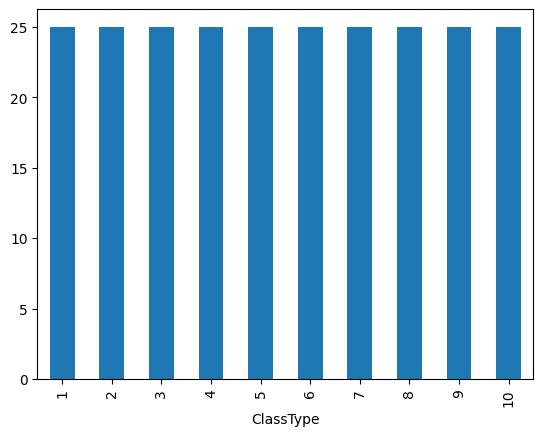

In [61]:
fig, ax = plt.subplots()
train_df['ClassType'].value_counts().plot(ax=ax, kind='bar')

1. Buildings - large building, residential, non-residential, fuel storage facility, fortified building
2. Misc. Manmade structures 
3. Road 
4. Track - poor/dirt/cart track, footpath/trail
5. Trees - woodland, hedgerows, groups of trees, standalone trees
6. Crops - contour ploughing/cropland, grain (wheat) crops, row (potatoes, turnips) crops
7. Waterway 
8. Standing water
9. Vehicle Large - large vehicle (e.g. lorry, truck,bus), logistics vehicle
10. Vehicle Small - small vehicle (car, van), motorbike


In [62]:
df.head()

,ImageId,ClassType,MultipolygonWKT,Xmax,Ymin
0,6040_2_2,1,MULTIPOLYGON EMPTY,0.009158,-0.009043
1,6040_2_2,2,MULTIPOLYGON EMPTY,0.009158,-0.009043
2,6040_2_2,3,MULTIPOLYGON EMPTY,0.009158,-0.009043
3,6040_2_2,4,MULTIPOLYGON (((0.003025 -0.007879000000000001...,0.009158,-0.009043
4,6040_2_2,5,MULTIPOLYGON (((0.005311 -0.009044999999999999...,0.009158,-0.009043


In [64]:
df[UNIQUE_ID].value_counts()  # number of unique pictures.

ImageId
6040_2_2    10
6160_2_1    10
6040_4_4    10
6010_1_2    10
6070_2_3    10
6060_2_3    10
6170_0_4    10
6170_4_1    10
6170_2_4    10
6010_4_4    10
6110_3_1    10
6140_1_2    10
6150_2_3    10
6120_2_2    10
6100_2_3    10
6110_1_2    10
6140_3_1    10
6110_4_0    10
6010_4_2    10
6100_1_3    10
6040_1_0    10
6040_1_3    10
6090_2_0    10
6120_2_0    10
6100_2_2    10
Name: count, dtype: int64

In [65]:
df["ClassType"].value_counts()  # number of images per class type

ClassType
1     25
2     25
3     25
4     25
5     25
6     25
7     25
8     25
9     25
10    25
Name: count, dtype: int64

In [66]:
def parse_wkt(wkt_str):
    return shapely.from_wkt(wkt_str)

In [67]:
test_wkt_df = df["MultipolygonWKT"].apply(lambda wkt: parse_wkt(wkt))

In [68]:
test_wkt_df

0                                     MULTIPOLYGON EMPTY
1                                     MULTIPOLYGON EMPTY
2                                     MULTIPOLYGON EMPTY
3      MULTIPOLYGON (((0.003025 -0.007879, 0.003074 -...
4      MULTIPOLYGON (((0.005311 -0.009045, 0.00531 -0...
                             ...                        
245    MULTIPOLYGON (((0.006102 -0.009042, 0.00642 -0...
246    MULTIPOLYGON (((0.007888 -0.009042, 0.007856 -...
247    MULTIPOLYGON (((0.002119 -0.001417, 0.002132 -...
248    MULTIPOLYGON (((0.008021 -0.003252, 0.008034 -...
249    MULTIPOLYGON (((0.003194 -0.0089, 0.003201 -0....
Name: MultipolygonWKT, Length: 250, dtype: object

## Building

In [69]:
IM_ID = '6120_2_2'
POLY_TYPE = '1'

In [70]:
# Load grid size
x_max = y_min = None
for _im_id, _x, _y in csv.reader(open('../input/grid_sizes.csv')):
    if _im_id == IM_ID:
        x_max, y_min = float(_x), float(_y)
        break
print (x_max)
print (y_min)
# Load train poly with shapely
train_polygons = None
for _im_id, _poly_type, _poly in csv.reader(open('../input/train_wkt_v4.csv')):
    if _im_id == IM_ID and _poly_type == POLY_TYPE:
        train_polygons = shapely.wkt.loads(_poly)
        break

# Read image with tiff
im_rgb = tiff.imread('../input/three_band/{}.tif'.format(IM_ID)).transpose([1, 2, 0])
im_size = im_rgb.shape[:2]
print (im_size)

FileNotFoundError: [Errno 2] No such file or directory: '../input/grid_sizes.csv'